# Introduction to matplotlib
### plots are also reffered as figure

In [1]:
#magic method tell jupyter notebook to show plots within it

%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

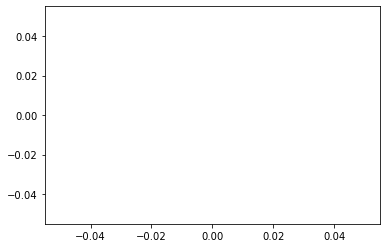

In [2]:
plt.plot();

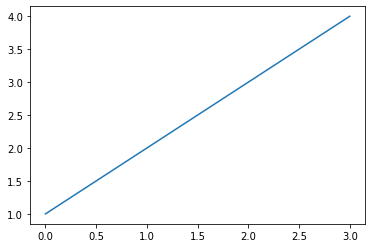

In [3]:
plt.plot([1, 2, 3, 4]);

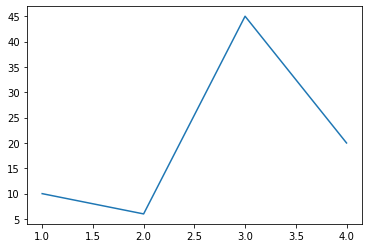

In [4]:
x = [1, 2, 3, 4]
y = [10, 6, 45, 20]
plt.plot(x, y);

## Try to use object-orinted interface over pyplot
*its more flexible*

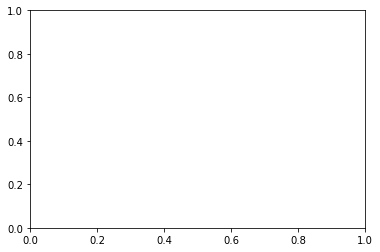

In [5]:
# method 1
fig = plt.figure() # creates the figure(empty square)
ax = fig.add_subplot() # creates x, y axis called axes
plt.show()

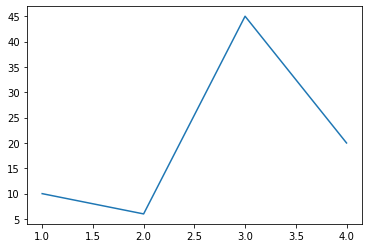

In [6]:
# 2nd method
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(x, y) # add data
plt.show()

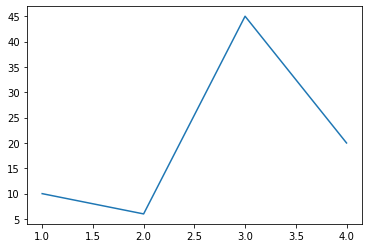

In [7]:
# 3rd method (recommended)
fig, ax = plt.subplots() # returns fig, axes(x, y)
ax.plot(x, y);

## MatPlotLib workflow

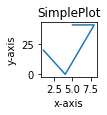

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

# 1.Prepare data
x = [1, 4, 8, 5]
y = [20, 0, 41, 41]

# 2.Setup plot                  x, y
fig, ax = plt.subplots(figsize=(1, 1)) # gap b/w each values

# 3.Plot data
ax.plot(x, y)

# 4.Customize the plot
ax.set(title = 'SimplePlot',
       xlabel = 'x-axis',
       ylabel = 'y-axis')

# 5.Save the plot
fig.savefig('Simpleplot.png')

## Plotting data using Numpy

* make sure to everytime create fig, ax on new shell!

we want
* *line plot*
* *scatter plot*
* *hist*
* *bar plot*
* *sub plot*

In [9]:
            # start, stop
x = np.linspace(0, 20, 50) # creates 50 sample 
# linspace returns evenly spaced values
x[:5]

array([0.        , 0.40816327, 0.81632653, 1.2244898 , 1.63265306])

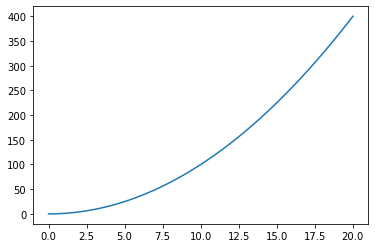

In [10]:
# lone plot
fig, ax = plt.subplots()

ax.plot(x, x**2);

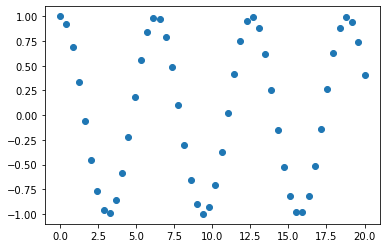

In [11]:
# scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.cos(x));

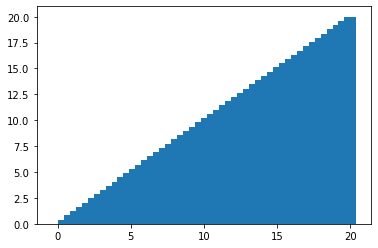

In [12]:
# bar graph
fig, ax = plt.subplots()
ax.bar(x, np.abs(x));

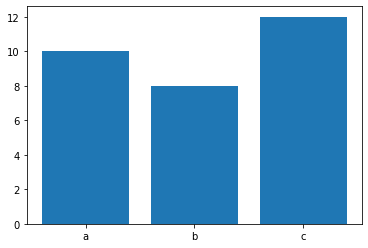

In [13]:
# make a bar graph from dict
prices = {'a': 10, 'b': 8, 'c': 12}
fig, ax = plt.subplots()
ax.bar(prices.keys(), prices.values());

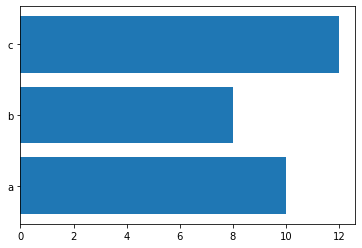

In [14]:
# horizontal bar
fig, ax = plt.subplots()
ax.barh(list(prices.keys()), list(prices.values()));
# barh takes only list

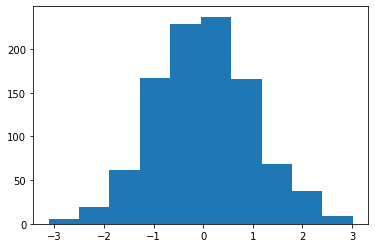

In [15]:
# histograms
x = np.random.randn(1000) # randn is normal distribution
fig, ax = plt.subplots()
ax.hist(x);

### Two option for `subplots()`
flexibility of object oriented interface

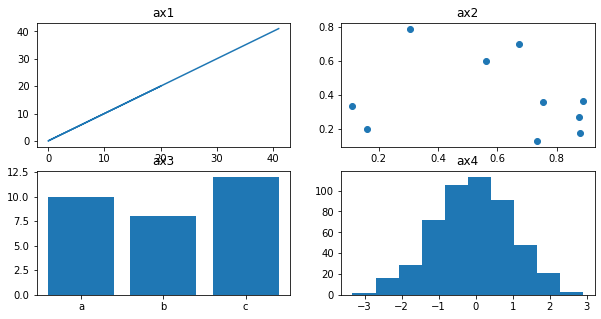

In [16]:
# option 1                              
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (10, 5))
# with subplots you can create as many figures

ax1.set(title='ax1')
ax2.set(title='ax2')
ax3.set(title='ax3')
ax4.set(title='ax4')

# plot data on each figure
ax1.plot(y, y)
ax2.scatter(np.random.random(10), np.random.random(10))
ax3.bar(prices.keys(), prices.values())
ax4.hist(np.random.randn(500));

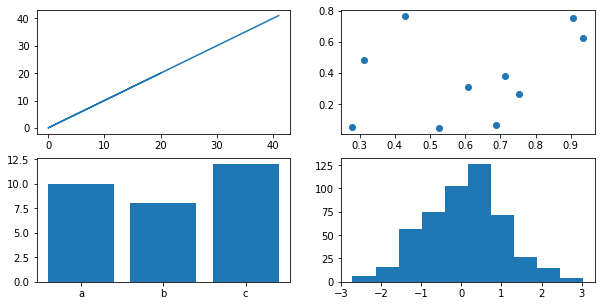

In [17]:
# option 2
         
fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (10, 5))
# now it creates indexing

# plot data on each figure
ax[0, 0].plot(y, y)
ax[0, 1].scatter(np.random.random(10), np.random.random(10))
ax[1, 0].bar(prices.keys(), prices.values())
ax[1][1].hist(np.random.randn(500));

# both [a, a] & [a][a] works

## Plotting from pandas DataFrame

* Remember you can only plot Series or DataFrame

In [18]:
# Make a DataFrame
car_sales = pd.read_csv('../Pandas/car-sales.csv')
car_sales[:3]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"


In [19]:
# basic examaple for series                # date_range returns a fixed frequency datetime index
ts = pd.Series(np.random.randn(1000), index = pd.date_range('1/1/2022', periods = 1000))

<AxesSubplot:>

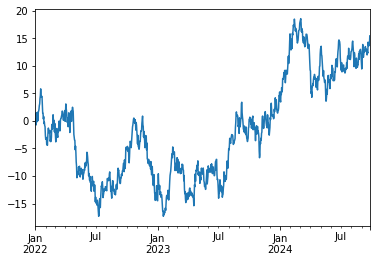

In [20]:
ts = ts.cumsum() # returns cumulative sum of columns
ts.plot()

In [21]:
pd.date_range('1/1/2022', periods = 1000) # returns 1000 days

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10',
               ...
               '2024-09-17', '2024-09-18', '2024-09-19', '2024-09-20',
               '2024-09-21', '2024-09-22', '2024-09-23', '2024-09-24',
               '2024-09-25', '2024-09-26'],
              dtype='datetime64[ns]', length=1000, freq='D')

In [22]:
car_sales[:4]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"


In [23]:
car_sales['Price'] = car_sales['Price'].str.replace('[\$\,\.]', '', regex=True)
car_sales[:4]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000


In [24]:
type(car_sales['Price'][0])

str

In [25]:
# Remove last two zeros
car_sales['Price'] = car_sales['Price'].str[:-2] # we are slicing the str not Series
car_sales[:3]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000


In [26]:
# adding new colum for Sales date
car_sales['Sales-Date'] = pd.date_range('18/09/2021', periods=len(car_sales))
car_sales[:4]

,Make,Colour,Odometer (KM),Doors,Price,Sales-Date
0,Toyota,White,150043,4,4000,2021-09-18
1,Honda,Red,87899,4,5000,2021-09-19
2,Toyota,Blue,32549,3,7000,2021-09-20
3,BMW,Black,11179,5,22000,2021-09-21


In [27]:
# adding sales price everyday
car_sales['Total Sales $'] = car_sales['Price'].astype(int).cumsum()
car_sales

# cumsum adds every column one by one

,Make,Colour,Odometer (KM),Doors,Price,Sales-Date,Total Sales $
0,Toyota,White,150043,4,4000,2021-09-18,4000
1,Honda,Red,87899,4,5000,2021-09-19,9000
2,Toyota,Blue,32549,3,7000,2021-09-20,16000
3,BMW,Black,11179,5,22000,2021-09-21,38000
4,Nissan,White,213095,4,3500,2021-09-22,41500
5,Toyota,Green,99213,4,4500,2021-09-23,46000
6,Honda,Blue,45698,4,7500,2021-09-24,53500
7,Honda,Blue,54738,4,7000,2021-09-25,60500
8,Toyota,White,60000,4,6250,2021-09-26,66750
9,Nissan,White,31600,4,9700,2021-09-27,76450


* **pandas plot version, you can call column & row name directily as x & y**

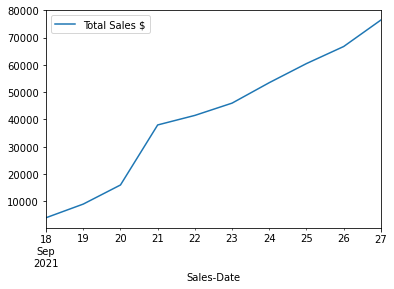

In [28]:
# plotting the total sales in pnadas
car_sales.plot(x='Sales-Date', y='Total Sales $');

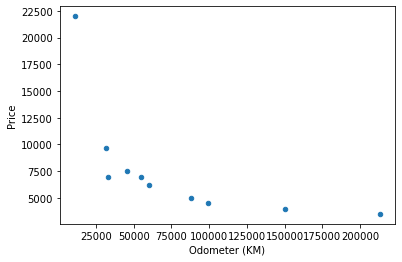

In [29]:
# reassigning to int
car_sales['Price'] = car_sales['Price'].astype(int)

# scatter plot in pandas
car_sales.plot(x='Odometer (KM)', y='Price', kind='scatter');

In [30]:
# bar graph in pandas        #x  #y
random_array = np.random.rand(10, 4)

# creating a DataFrame
df = pd.DataFrame(random_array, columns=['a', 'b', 'c', 'd'])

df

,a,b,c,d
0,0.059716,0.363174,0.404469,0.375320
1,0.753830,0.953132,0.239536,0.813781
2,0.323006,0.601541,0.056081,0.789431
3,0.673750,0.330708,0.699726,0.612012
4,0.345964,0.564739,0.057630,0.733530
5,0.485892,0.425773,0.144514,0.106462
6,0.840068,0.818150,0.591998,0.279083
7,0.108996,0.527129,0.699591,0.203304
8,0.225963,0.886711,0.072001,0.972603
9,0.633993,0.137078,0.149395,0.848475


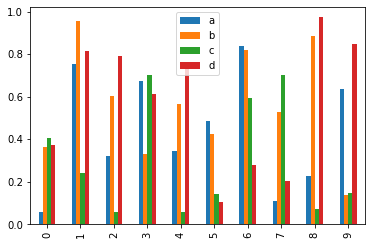

In [31]:
# plotting bar in pandas
df.plot.bar(); # or df.plot(kind="bar")

# by default x is index(axis 0) and y is values of a,b,c,d

In [32]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sales-Date,Total Sales $
0,Toyota,White,150043,4,4000,2021-09-18,4000
1,Honda,Red,87899,4,5000,2021-09-19,9000
2,Toyota,Blue,32549,3,7000,2021-09-20,16000
3,BMW,Black,11179,5,22000,2021-09-21,38000
4,Nissan,White,213095,4,3500,2021-09-22,41500
5,Toyota,Green,99213,4,4500,2021-09-23,46000
6,Honda,Blue,45698,4,7500,2021-09-24,53500
7,Honda,Blue,54738,4,7000,2021-09-25,60500
8,Toyota,White,60000,4,6250,2021-09-26,66750
9,Nissan,White,31600,4,9700,2021-09-27,76450


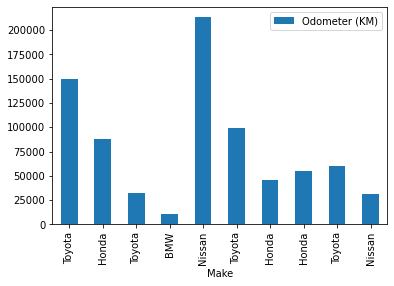

In [33]:
car_sales.plot(x = 'Make', y = 'Odometer (KM)', kind='bar');

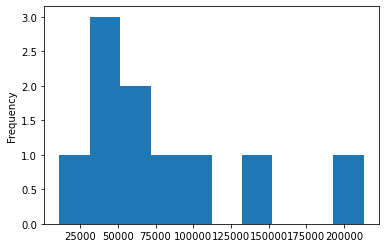

In [34]:
# histograms in pandas

car_sales['Odometer (KM)'].plot.hist();

* **For larger data increase the bins**

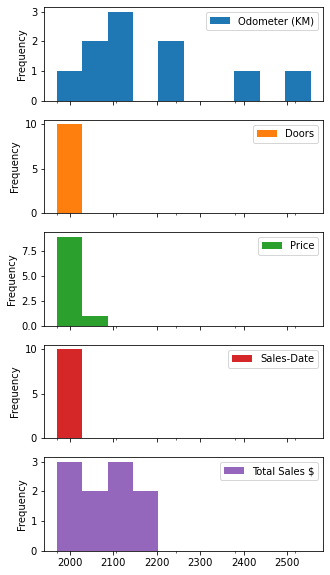

In [35]:
# To plot every column
car_sales.plot.hist(subplots=True, figsize=(5, 10)); # subplots=True creates individual figures 
                                                    # for each column
# plots only numeric values

#### Lets try another dataset

In [36]:
heart_disease = pd.read_csv('../heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


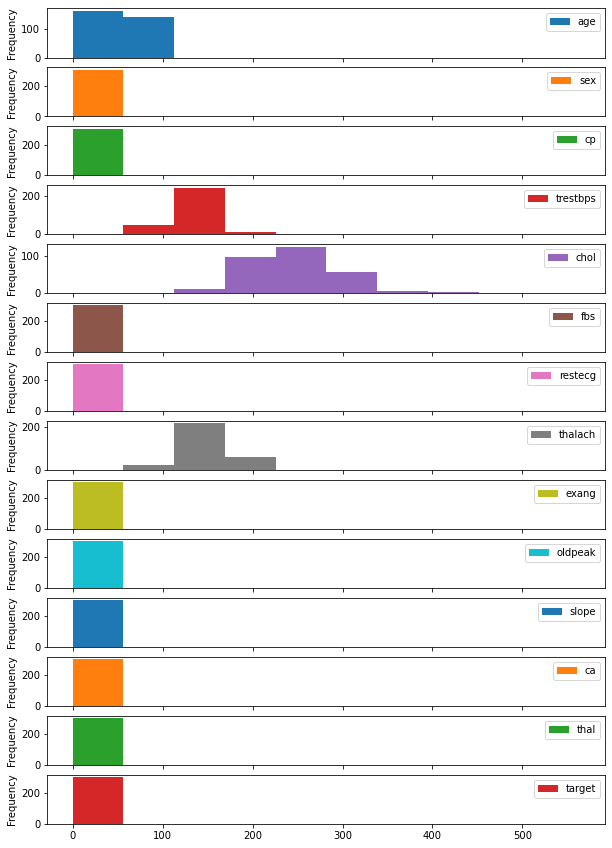

In [37]:
# to plot every column in hist in pandas
heart_disease.plot.hist(subplots=True, figsize=(10, 15));

# but it creates same scale for all

### Which one to use? (pyplot or OO method)

* use pyplot when plotting quickly

* use OO method for advanced plotting (taking care of individual subplots)

In [38]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [39]:
# lets get people age over 50
over_50 = heart_disease[heart_disease['age'] > 50]
len(over_50)

208

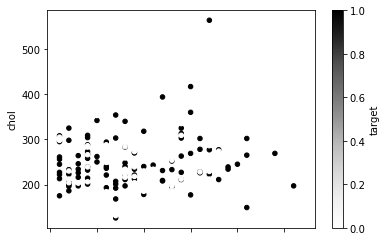

In [40]:
# lets plot (Pyplot method)                                           # color
over_50.plot(x = 'age', y = 'chol', kind = 'scatter', c = 'target');

(45.0, 100.0)

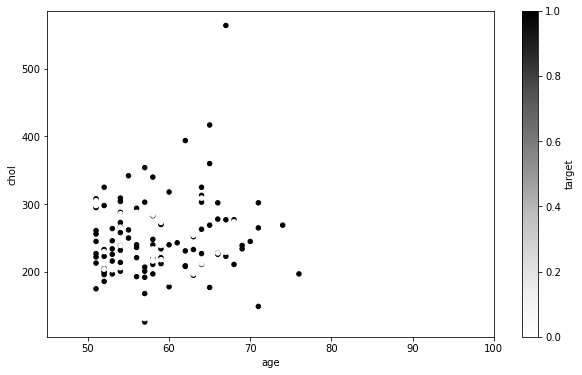

In [41]:
# lets plot (OO method mixed with pyplot method)
fig, ax = plt.subplots(figsize=(10, 6))
over_50.plot(x = 'age', y = 'chol', kind = 'scatter', c = 'target', ax = ax);


# to set scale limit
ax.set_xlim(left=45, right=100)

### OO method from scratch

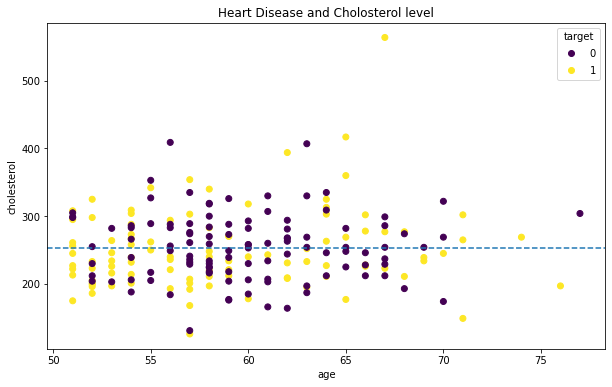

In [42]:
fig, ax = plt.subplots(figsize=(10, 6))

# plot the data
scatter = ax.scatter(x = over_50['age'],
                     y = over_50['chol'],
                     c = over_50['target'])

# customize the plot
ax.set(title = 'Heart Disease and Cholosterol level',
       xlabel = 'age',
       ylabel = 'cholesterol')


# Add a legend
            # gets c from scatter variable
ax.legend(*scatter.legend_elements(), title='target')

# add a horizontal line
ax.axhline(y = over_50['chol'].mean(),  # now draws at avg
           linestyle = '--');

In [43]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [44]:
# creating subplots age, chol, thalach

Text(0.5, 0.98, 'Heart Disease Analysis')

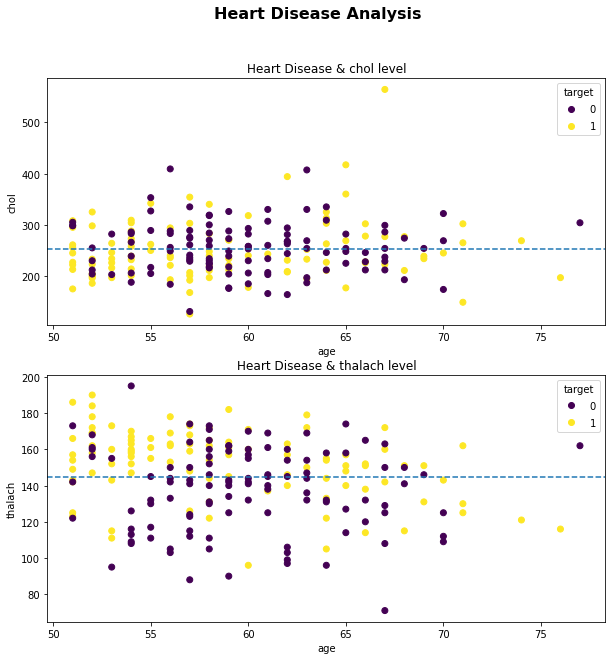

In [45]:
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols= 1, figsize=(10, 10))

def plot_data(ax, col):
    scatter = ax.scatter(x = over_50['age'], y = over_50[f'{col}'], c = over_50['target'])
    ax.set(title = f'Heart Disease & {col} level', xlabel = 'age', ylabel = f'{col}')
    ax.legend(*scatter.legend_elements(), title = 'target')
    ax.axhline(y = over_50[f'{col}'].mean(), linestyle = 'dashed')
    
plot_data(ax = ax0, col = 'chol')
plot_data(ax = ax1, col = 'thalach')

# adding centered title to figure                    
fig.suptitle('Heart Disease Analysis', fontsize = 16, fontweight = 'bold')

## Customizing Matplotlib plots

In [46]:
# show the available different styles
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

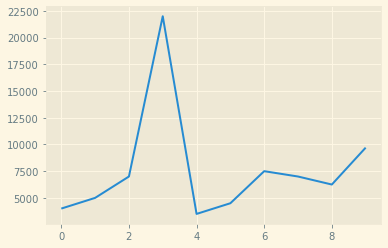

In [47]:
# Trying out new style
plt.style.use('Solarize_Light2')
car_sales['Price'].plot();

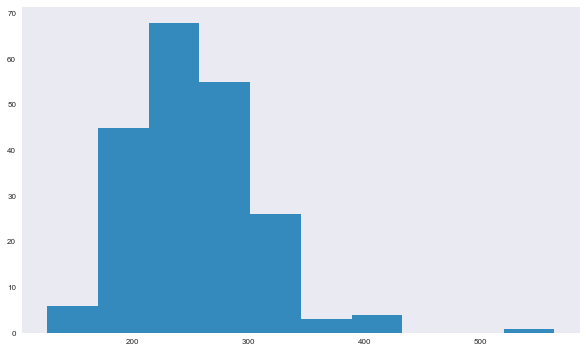

In [64]:
plt.style.use('seaborn-dark')

fig, ax = plt.subplots(figsize = (10, 6))
ax.hist(x = over_50['chol']);

### customizing Heart Disease Graph

Text(0.5, 0.98, 'Heart Disease Analysis')

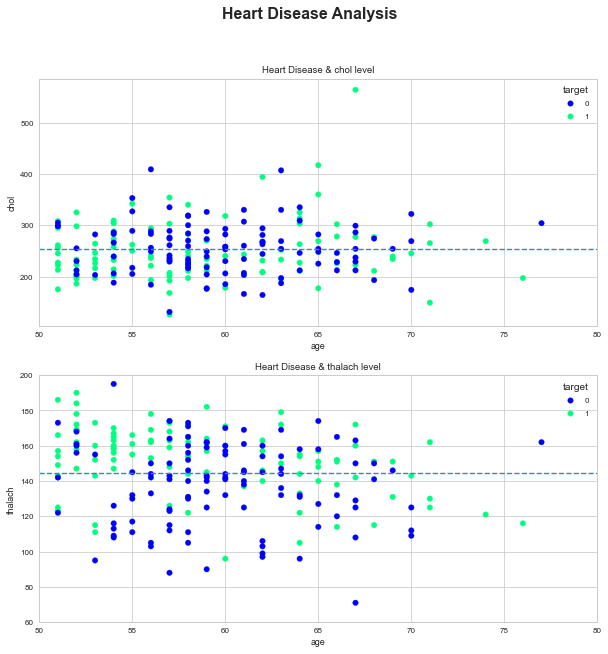

In [80]:
# cutomizing the figure
plt.style.use('seaborn-whitegrid')

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols= 1, figsize=(10, 10))

def plot_data(ax, col, ylim:bool):
    scatter = ax.scatter(x = over_50['age'], y = over_50[f'{col}'], c = over_50['target'], 
                        cmap = 'winter') # cmap changes colours
    ax.set(title = f'Heart Disease & {col} level', xlabel = 'age', ylabel = f'{col}')
    ax.legend(*scatter.legend_elements(), title = 'target')
    ax.axhline(y = over_50[f'{col}'].mean(), linestyle = 'dashed')
    
    # changing x & y limitation to cutoff 0-50 grid line
    ax.set_xlim(left = 50, right = 80)  #or ax.set_xlim((50, 80))
    
    if ylim: # only ax1 top line has grid
        ax.set_ylim(top = 200, bottom = 60)
    
plot_data(ax = ax0, col = 'chol', ylim=False)
plot_data(ax = ax1, col = 'thalach', ylim=True)

# adding centered title to figure                    
fig.suptitle('Heart Disease Analysis', fontsize = 16, fontweight = 'bold')


In [82]:
# to save this plot
fig.savefig('heart-disease-analysis-saved-by-code.png')